In [244]:
# Dependencies and Setup

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure


# Create an empty dataframe for the top qb for each year, in the for loop you will add on to this one by one
top_qbs = pd.DataFrame()
top_rbs = pd.DataFrame()
team_records = []

#TOM ADDED
full_qbs = pd.DataFrame()
full_rbs = pd.DataFrame()

# Create list of years you care about
years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

# Loop through every year to store data from CSVs into dataframe
for year in years:
    print("Getting stats for year " + year + "...")
    qb_filename = "player_stats/qb_"+year+".csv"
    rb_filename = "player_stats/rb_"+year+".csv"
    
    current_year_qbs = pd.read_csv(qb_filename)
    
    # Get only the columns we care about from the full data
    current_year_qbs = current_year_qbs[['Player', 'Tm', 'Pos', 'QBrec', 'Yds']]
    
      
    # Calculate win percentage
    #current_year_qbs["Win_Rate"] = current_year_qbs.div[["Wins"]/(current_year_qbs["Wins"] + current_year_qbs["Losses"])
    # Filter out non QBs from our data
    current_year_qbs = current_year_qbs[current_year_qbs['Pos']=='QB']
    
    ###BEWARE TOM ADDED YEAR COLUMN
    current_year_qbs['Year'] = year
    
    # Split QBrec into wins and losses
    record = current_year_qbs["QBrec"].str.split('-', n = 2, expand = True)
    current_year_qbs.drop(columns=["QBrec"], inplace=True)
    
    current_year_records = current_year_qbs[['Tm']]
    current_year_records["Wins"] = pd.to_numeric(record[0])
    current_year_records["Losses"] = pd.to_numeric(record[1])
    
  
    # Sort our data by passing yards
    current_year_qbs = current_year_qbs.sort_values(by=['Yds'], ascending=False)
    current_year_qbs = pd.merge(current_year_qbs, current_year_records, on="Tm")
    #print(current_year_qbs)
    ###TOM CHANGED WAY OF APPENDING
    top_qb = current_year_qbs.iloc[0]
    top_qbs = top_qbs.append(top_qb)
    full_qbs = full_qbs.append(current_year_qbs)
   
    
    current_year_rbs = pd.read_csv(rb_filename)
    current_year_rbs = current_year_rbs[['Player', 'Tm', 'Pos', 'Yds']]
    
    # Filter out non RBs from our data
    current_year_rbs = current_year_rbs[current_year_rbs['Pos']=='RB']
    
    
    current_year_rbs['Year'] = year
    
    # Sort our data by rushing yards
    current_year_rbs = current_year_rbs.sort_values(by=['Yds'], ascending=False)
    
    current_year_rbs = pd.merge(current_year_rbs, current_year_records, on="Tm")
    
    top_rb = current_year_rbs.iloc[0]
    top_rbs = top_rbs.append(top_rb)
    full_rbs = full_rbs.append(current_year_rbs)

#top_qbs = pd.concat(top_qbs)
#top_rbs = pd.concat(top_rbs)
print(top_qbs)
print(top_rbs)
    
  



Getting stats for year 2009...
Getting stats for year 2010...
Getting stats for year 2011...
Getting stats for year 2012...
Getting stats for year 2013...
Getting stats for year 2014...
Getting stats for year 2015...
Getting stats for year 2016...
Getting stats for year 2017...
Getting stats for year 2018...
   Losses                       Player Pos   Tm  Wins     Yds  Year
0     7.0        Matt Schaub*\SchaMa00  QB  HOU   9.0  4770.0  2009
0     7.0      Philip Rivers*\RivePh00  QB  SDG   9.0  4710.0  2010
0     3.0         Drew Brees*\BreeDr00  QB  NOR  13.0  5476.0  2011
0     9.0         Drew Brees*\BreeDr00  QB  NOR   7.0  5177.0  2012
0     3.0    Peyton Manning*+\MannPe00  QB  DEN  13.0  5477.0  2013
0     9.0         Drew Brees*\BreeDr00  QB  NOR   7.0  4952.0  2014
0     8.0          Drew Brees\BreeDr00  QB  NOR   7.0  4870.0  2015
0     9.0         Drew Brees*\BreeDr00  QB  NOR   7.0  5208.0  2016
0     3.0         Tom Brady*+\BradTo00  QB  NWE  13.0  4577.0  2017
0     6.0 

In [245]:
full_qbs[full_qbs.Tm == 'TEN']

#Team wins/losses do not add up to 16 games in a single year

,Player,Tm,Pos,Yds,Year,Wins,Losses
26,Vince Young*\YounVi00,TEN,QB,1879,2009,8,2
31,Vince Young\YounVi00,TEN,QB,1255,2010,4,4
13,Matt Hasselbeck\HassMa00,TEN,QB,3571,2011,9,7
27,Jake Locker\LockJa00,TEN,QB,2176,2012,4,7
25,Ryan Fitzpatrick\FitzRy00,TEN,QB,2454,2013,3,6
22,Marcus Mariota\MariMa01,TEN,QB,2818,2015,3,9
22,Marcus Mariota\MariMa01,TEN,QB,3426,2016,8,7
19,Marcus Mariota\MariMa01,TEN,QB,3232,2017,9,6
25,Marcus Mariota\MariMa01,TEN,QB,2528,2018,7,6


In [246]:
full_qbs.groupby(by = ["Tm", "Year"]).sum()

#Checking to see why each team does not get 16 games in a year and realizing it is only reading the first QB record in the list instead of all for one team

Yds  Wins  Losses
Tm  Year                    
ARI 2009  3753    10       5
    2010  2065     2       7
    2011  1955     3       6
    2013  4274    10       6
    2014  1711     5       3
    2015  4671    13       3
    2016  4233     6       8
    2018  2278     3      10
ATL 2009  2916     9       5
    2010  3705    13       3
    2011  4177    10       6
    2012  4719    13       3
    2013  4515     4      12
    2014  4694     6      10
    2015  4591     8       8
    2016  4944    11       5
    2017  4095    10       6
    2018  4924     7       9
BAL 2009  3613     9       7
    2010  3622    12       4
    2011  3610    12       4
    2012  3817    10       6
    2013  3912     8       8
    2014  3986    10       6
    2015  2791     3       7
    2016  4317     8       8
    2017  3141     9       7
    2018  2465     4       5
BUF 2009  1422     4       4
    2010  3000     4       9
...        ...   ...     ...
STL 2014  7316    12      20
    2015  2052     4       7
TAM 2009  1855     3       6
    2010  3451    10       6
    2011  3592     4      11
    2012  4065     7       9
    2013  2608     4       9
    2014  2206     1      10
    2015  4042     6      10
    2016  4090     9       7
    2017  3504     3      10
    2018  2992     3       6
TEN 2009  1879     8       2
    2010  1255     4       4
    2011  3571     9       7
    2012  2176     4       7
    2013  2454     3       6
    2015  2818     3       9
    2016  3426     8       7
    2017  3232     9       6
    2018  2528     7       6
WAS 2009  3618     4      12
    2010  3377     5       8
    2011  3151     5       8
    2012  3200     9       6
    2013  3203     3      10
    2015  4166     9       7
    2016  4917     8       7
    2017  4093     7       9
    2018  2180     6       4

[311 rows x 3 columns]

In [247]:
current_year_qbs

,Player,Tm,Pos,Yds,Year,Wins,Losses
0,Ben Roethlisberger\RoetBe00,PIT,QB,5129,2018,9,6
1,Patrick Mahomes*+\MahoPa00,KAN,QB,5097,2018,12,4
2,Matt Ryan\RyanMa00,ATL,QB,4924,2018,7,9
3,Jared Goff*\GoffJa00,LAR,QB,4688,2018,13,3
4,Andrew Luck*\LuckAn00,IND,QB,4593,2018,10,6
5,Aaron Rodgers*\RodgAa00,GNB,QB,4442,2018,6,9
6,Tom Brady*\BradTo00,NWE,QB,4355,2018,11,5
7,Philip Rivers*\RivePh00,LAC,QB,4308,2018,12,4
8,Eli Manning\MannEl00,NYG,QB,4299,2018,5,11
9,Kirk Cousins\CousKi00,MIN,QB,4298,2018,8,7


In [248]:
#Chart out the best QB and RB per season along with how many wins their team had that season
# Obtain the x and y coordinates for each of the positions
split_data = current_year_qbs.groupby("Pos")
current_year_qbs.Wins.value_counts()


# Splitting data by position
qb_data = split_data.get_group("QB")


# Counting how many wins per player (X Axis)
qb_counts = qb_data.Wins.value_counts()


# Counting how many losses per player (Y Axis)
qb_loss = qb_data.Losses.value_counts()


# Seeing players uniqueness amongst yards (Z Axis)
qb_drivers = qb_data.Yds.unique()


player_types = current_year_qbs.groupby(current_year_qbs.Wins)


print (qb_counts)
print (qb_loss)

6     6
5     5
3     4
11    3
10    3
4     3
13    2
12    2
7     2
9     1
8     1
Name: Wins, dtype: int64
6     10
9      4
5      4
10     3
4      3
7      2
3      2
12     1
11     1
8      1
2      1
Name: Losses, dtype: int64


In [249]:
"""split_data = current_year_rbs.groupby("Pos")
current_year_rbs.Wins.value_counts()

rb_data = split_data.get_group("RB")

rb_counts = rb_data.Wins.value_counts()

rb_loss = rb_data.Losses.value_counts()

rb_drivers = rb_data.Yds.unique()

player_types = current_year_rbs.groupby(current_year_rbs.Wins)

"""


'split_data = current_year_rbs.groupby("Pos")\ncurrent_year_rbs.Wins.value_counts()\n\nrb_data = split_data.get_group("RB")\n\nrb_counts = rb_data.Wins.value_counts()\n\nrb_loss = rb_data.Losses.value_counts()\n\nrb_drivers = rb_data.Yds.unique()\n\nplayer_types = current_year_rbs.groupby(current_year_rbs.Wins)\n\n'

In [250]:
qb_data

,Player,Tm,Pos,Yds,Year,Wins,Losses
0,Ben Roethlisberger\RoetBe00,PIT,QB,5129,2018,9,6
1,Patrick Mahomes*+\MahoPa00,KAN,QB,5097,2018,12,4
2,Matt Ryan\RyanMa00,ATL,QB,4924,2018,7,9
3,Jared Goff*\GoffJa00,LAR,QB,4688,2018,13,3
4,Andrew Luck*\LuckAn00,IND,QB,4593,2018,10,6
5,Aaron Rodgers*\RodgAa00,GNB,QB,4442,2018,6,9
6,Tom Brady*\BradTo00,NWE,QB,4355,2018,11,5
7,Philip Rivers*\RivePh00,LAC,QB,4308,2018,12,4
8,Eli Manning\MannEl00,NYG,QB,4299,2018,5,11
9,Kirk Cousins\CousKi00,MIN,QB,4298,2018,8,7


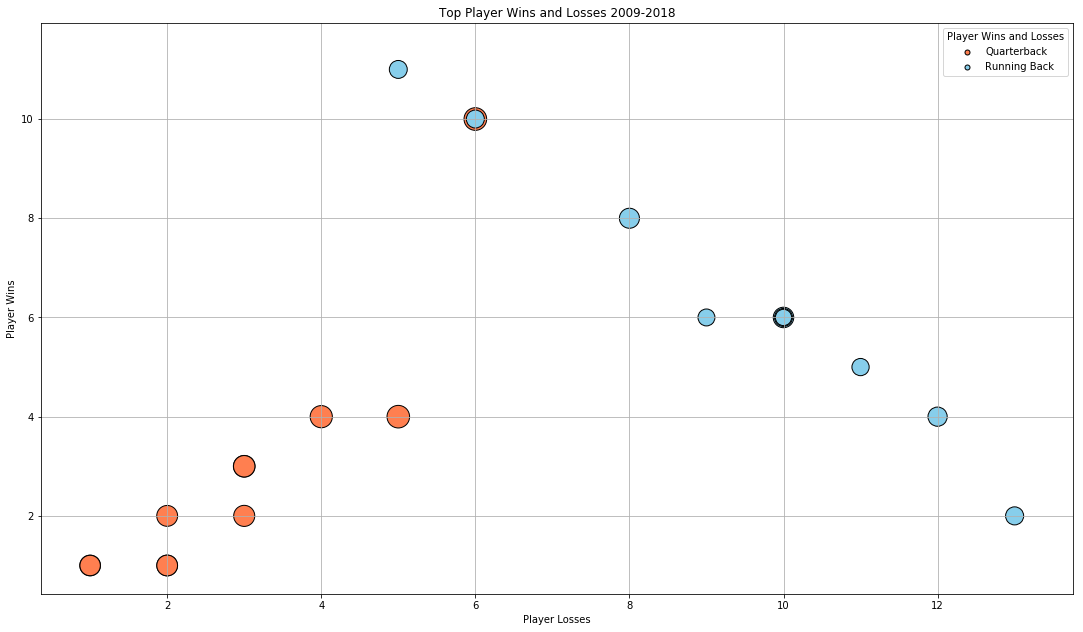

In [251]:
#Chart out the best QB and RB per season along with how many wins their team had that season
# Obtain the x and y coordinates for each of the positions
split_data = current_year_qbs.groupby("Pos")
current_year_qbs.Wins.value_counts()

# Splitting data by position
qb_data = split_data.get_group("QB")



# Amount of losses per QB (X Axis)
qb_loss = qb_data.Losses.value_counts()


# Amount of Wins per QB (Y Axis)
qb_counts = qb_data.Wins.value_counts()


# Yards per QB (Z Axis)
qb_drivers = qb_data.Yds.unique()

# Current Year QBs grouped by losses
player_types = current_year_qbs.groupby(current_year_qbs.Losses)



# Build the scatter plots for each city types

plt.scatter(qb_counts, qb_loss, s = qb_drivers*0.1, c = 'coral', label = "Quarterback", edgecolor = "black")
plt.scatter(rb_counts, rb_loss, s = rb_drivers*0.2, c = 'skyblue', label = "Running Back", edgecolor = "black")


# Incorporate the other graph properties


# Create a legend
legend = plt.legend(title = "Player Wins and Losses", markerscale = 0.5)
for handle in legend.legendHandles:
    handle.set_sizes([25.0])

plt.title("Top Player Wins and Losses 2009-2018")

plt.grid()
plt.xlabel("Player Losses")
plt.ylabel("Player Wins")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


# Save Figure
plt.savefig("ScatterPlot.png")

plt.show()


In [252]:
top_qbs = top_qbs[['Player', 'Pos', 'Tm', 'Yds', 'Wins', 'Losses', 'Year']]
top_rbs = top_rbs[['Player', 'Pos', 'Tm', 'Yds', 'Wins', 'Losses', 'Year']]

In [253]:
top_rbs_new_index = top_rbs.reset_index()

top_rbs_new_index.at[0, 'Losses'] = 8
top_rbs_new_index.at[2, 'Wins'] = 5
top_rbs_new_index.at[2, 'Losses'] = 11

top_rbs_new_index.at[4, 'Wins'] = 10
top_rbs_new_index.at[4, 'Losses'] = 6
top_rbs_new_index.at[5, 'Losses'] = 4
top_rbs_new_index.at[8, 'Wins'] = 10

top_rbs_new_index.at[7, 'Losses'] = 2
top_rbs_new_index.at[9, 'Wins'] = 9



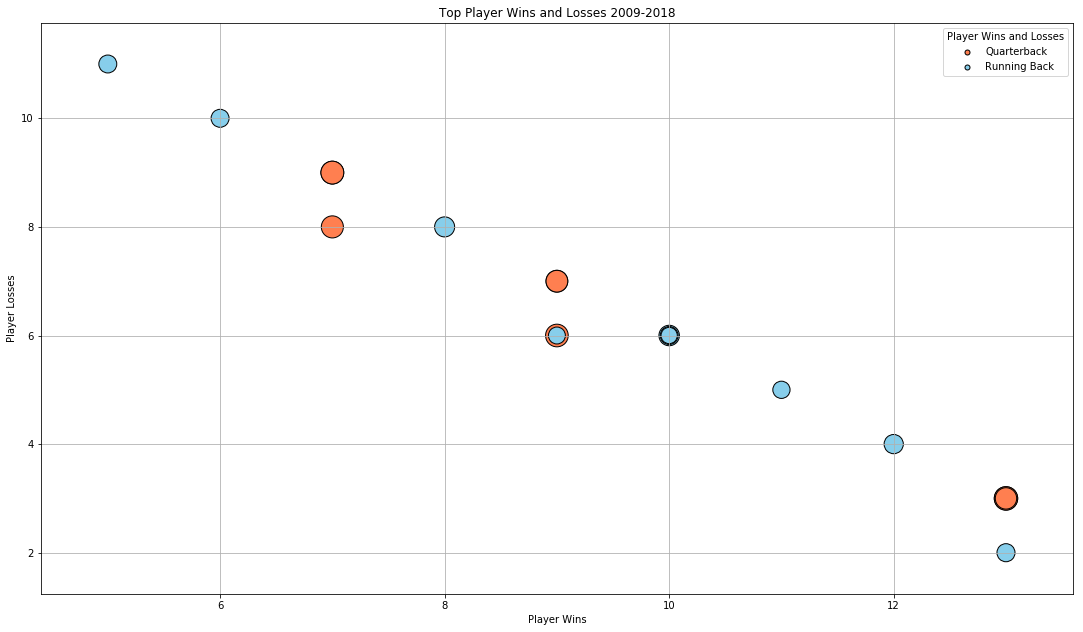

In [254]:
#split_data = current_year_rbs.groupby("Pos")
#current_year_rbs.Wins.value_counts()

rb_data = top_rbs_new_index


rb_loss = rb_data.Losses

rb_counts = rb_data.Wins


rb_drivers = rb_data.Yds.unique()

player_types = current_year_rbs.groupby(current_year_rbs.Wins)



#Chart out the best QB and RB per season along with how many wins their team had that season
# Obtain the x and y coordinates for each of the three city types
split_data = current_year_qbs.groupby("Pos")
current_year_qbs.Wins.value_counts()

# Merging QB data
qb_data = top_qbs


# Qb losses (X Axis)
qb_loss = qb_data.Losses

# Counting how many wins per QB (Y Axis)
qb_counts = qb_data.Wins


# Yards per QB (Z Axis)
qb_drivers = qb_data.Yds.unique()

#Current Year QB Losses
player_types = current_year_qbs.groupby(current_year_qbs.Losses)



# Build the scatter plots for each city types

plt.scatter(qb_counts, qb_loss, s = qb_drivers*0.1, c = 'coral', label = "Quarterback", edgecolor = "black")
plt.scatter(rb_counts, rb_loss, s = rb_drivers*0.2, c = 'skyblue', label = "Running Back", edgecolor = "black")


# Incorporate the other graph properties

# Create a legend
legend = plt.legend(title = "Player Wins and Losses", markerscale = 0.5)
for handle in legend.legendHandles:
    handle.set_sizes([25.0])

plt.title("Top Player Wins and Losses 2009-2018")

plt.grid()
plt.xlabel("Player Wins")
plt.ylabel("Player Losses")


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)



# Save Figure
plt.savefig("ScatterPlot.png")

plt.show()


In [255]:
top_qbs
top_rbs

,Player,Pos,Tm,Yds,Wins,Losses,Year
0,Chris Johnson*+\JohnCh04,RB,TEN,2006.0,8.0,2.0,2009
0,Arian Foster*+\FostAr00,RB,HOU,1616.0,6.0,10.0,2010
0,Maurice Jones-Drew*+\DrewMa00,RB,JAX,1606.0,4.0,10.0,2011
0,Adrian Peterson*+\PeteAd01,RB,MIN,2097.0,10.0,6.0,2012
0,LeSean McCoy*+\McCoLe01,RB,PHI,1607.0,8.0,2.0,2013
0,DeMarco Murray*+\MurrDe00,RB,DAL,1845.0,12.0,3.0,2014
0,Adrian Peterson*+\PeteAd01,RB,MIN,1485.0,11.0,5.0,2015
0,Ezekiel Elliott*+\ElliEz00,RB,DAL,1631.0,13.0,3.0,2016
0,Kareem Hunt*\HuntKa00,RB,KAN,1327.0,9.0,6.0,2017
0,Ezekiel Elliott*\ElliEz00,RB,DAL,1434.0,10.0,6.0,2018


In [256]:
top_rbs_new_index = top_rbs.reset_index()

In [257]:
top_rbs_new_index.at[0, 'Losses'] = 8
top_rbs_new_index.at[2, 'Wins'] = 5
top_rbs_new_index.at[2, 'Losses'] = 11

top_rbs_new_index.at[4, 'Wins'] = 10
top_rbs_new_index.at[4, 'Losses'] = 6
top_rbs_new_index.at[5, 'Losses'] = 4
top_rbs_new_index.at[8, 'Wins'] = 10

top_rbs_new_index.at[7, 'Losses'] = 2
top_rbs_new_index.at[9, 'Wins'] = 9



In [258]:
top_rbs_new_index

,index,Player,Pos,Tm,Yds,Wins,Losses,Year
0,0,Chris Johnson*+\JohnCh04,RB,TEN,2006.0,8.0,8.0,2009
1,0,Arian Foster*+\FostAr00,RB,HOU,1616.0,6.0,10.0,2010
2,0,Maurice Jones-Drew*+\DrewMa00,RB,JAX,1606.0,5.0,11.0,2011
3,0,Adrian Peterson*+\PeteAd01,RB,MIN,2097.0,10.0,6.0,2012
4,0,LeSean McCoy*+\McCoLe01,RB,PHI,1607.0,10.0,6.0,2013
5,0,DeMarco Murray*+\MurrDe00,RB,DAL,1845.0,12.0,4.0,2014
6,0,Adrian Peterson*+\PeteAd01,RB,MIN,1485.0,11.0,5.0,2015
7,0,Ezekiel Elliott*+\ElliEz00,RB,DAL,1631.0,13.0,2.0,2016
8,0,Kareem Hunt*\HuntKa00,RB,KAN,1327.0,10.0,6.0,2017
9,0,Ezekiel Elliott*\ElliEz00,RB,DAL,1434.0,9.0,6.0,2018


In [259]:
top_qbs

,Player,Pos,Tm,Yds,Wins,Losses,Year
0,Matt Schaub*\SchaMa00,QB,HOU,4770.0,9.0,7.0,2009
0,Philip Rivers*\RivePh00,QB,SDG,4710.0,9.0,7.0,2010
0,Drew Brees*\BreeDr00,QB,NOR,5476.0,13.0,3.0,2011
0,Drew Brees*\BreeDr00,QB,NOR,5177.0,7.0,9.0,2012
0,Peyton Manning*+\MannPe00,QB,DEN,5477.0,13.0,3.0,2013
0,Drew Brees*\BreeDr00,QB,NOR,4952.0,7.0,9.0,2014
0,Drew Brees\BreeDr00,QB,NOR,4870.0,7.0,8.0,2015
0,Drew Brees*\BreeDr00,QB,NOR,5208.0,7.0,9.0,2016
0,Tom Brady*+\BradTo00,QB,NWE,4577.0,13.0,3.0,2017
0,Ben Roethlisberger\RoetBe00,QB,PIT,5129.0,9.0,6.0,2018
